# 🏆 About Project 

## 🎯  Objective 

Insurance companies need to accurately predict the cost of health insurance for individuals to set premiums appropriately. However, traditional methods of cost prediction often rely on broad actuarial tables and historical averages, which may not account for the nuanced differences among individuals. By leveraging machine learning techniques, insurers can predict more accurately the insurance costs tailored to individual profiles, leading to more competitive pricing and better risk management.

**Insurance Cost Prediction need**
The primary need for this project arises from the challenges insurers face in pricing policies accurately while remaining competitive in the market. Inaccurate predictions can lead to losses for insurers and unfairly high premiums for policyholders. By implementing a machine learning model, insurers can:
- Enhance Precision in Pricing: Use individual data points to determine premiums that reflect actual risk more closely than generic estimates.
- Increase Competitiveness: Offer rates that are attractive to consumers while ensuring that the pricing is sustainable for the insurer.
- Improve Customer Satisfaction: Fair and transparent pricing based on personal health data can increase trust and satisfaction among policyholders.
- Enable Personalized Offerings: Create customized insurance packages based on predicted costs, which can cater more directly to the needs and preferences of individuals.
- Risk Assessment: Insurers can use the model to refine their risk assessment processes, identifying key factors that influence costs most significantly.
- Policy Development: The insights gained from the model can inform the development of new insurance products or adjustments to existing ones.
- Strategic Decision Making: Predictive analytics can aid in broader strategic decisions, such as entering new markets or adjusting policy terms based on risk predictions.
- Customer Engagement: Insights from the model can be used in customer engagement initiatives, such as personalized marketing and tailored advice for policyholders.


## 📚 Data Description

The dataset comprises the following 11 attributes:
1. Age: Numeric, ranging from 18 to 66 years.
2. Diabetes: Binary (0 or 1), where 1 indicates the presence of diabetes.
3. BloodPressureProblems: Binary (0 or 1), indicating the presence of blood pressure-related issues.
4. AnyTransplants: Binary (0 or 1), where 1 indicates the person has had a transplant.
5. AnyChronicDiseases: Binary (0 or 1), indicating the presence of any chronic diseases.
6. Height: Numeric, measured in centimeters, ranging from 145 cm to 188 cm.
7. Weight: Numeric, measured in kilograms, ranging from 51 kg to 132 kg.
8. KnownAllergies: Binary (0 or 1), where 1 indicates known allergies.
9. HistoryOfCancerInFamily: Binary (0 or 1), indicating a family history of cancer.
10. NumberOfMajorSurgeries: Numeric, counting the number of major surgeries, ranging from 0 to 3 surgeries.
11. PremiumPrice: Numeric, representing the premium price in currency, ranging from 15,000 to 40,000.


# 🚀 Let's Get Started

## 📚 Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
import warnings
import time
import datetime as dt
warnings.filterwarnings("ignore")

## 📊 Importing Dataset

In [2]:
! gdown 1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS

Downloading...
From: https://drive.google.com/uc?id=1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS
To: /kaggle/working/insurance.csv
100%|██████████████████████████████████████| 30.8k/30.8k [00:00<00:00, 67.6MB/s]


In [3]:
df = pd.read_csv('/kaggle/working/insurance.csv')
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


## 🎨 Custom Color Palette

In [4]:
def custom_palette(custom_colors):
    customPalette=sns.set_palette(sns.color_palette(custom_colors))
    sns.palplot(sns.color_palette(custom_colors),size=0.8)
    plt.tick_params(axis='both',labelsize=0,length=0)
    return


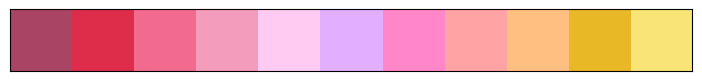

In [5]:
#defining colour palette
red = ["#4f000b","#720026","#ce4257","#ff7f51","#ff9b54"]
bo = ["#6930c3","#5e60ce","#0096c7","#48cae4","#ade8f4","#ff7f51","#ff9b54","#ffbf69"]
pink = ["#aa4465","#dd2d4a","#f26a8d","#f49cbb","#ffcbf2","#e2afff","#ff86c8","#ffa3a5","#ffbf81","#e9b827","#f9e576"]
custom_palette(pink)


## 📉 Basic Analysis

**Shape of the data**

In [6]:
df.shape

(986, 11)

**Inference**

- Shape of the data is 986 * 11
- Number of rows: 986
- Number of Columns: 11

**First Few Rows**

In [7]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


**Columns in the dataframe**

In [8]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

**Concise Summary**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


**Inference**

- There are no missing values in the dataset.
- All columns are of numeric type

**Descriptive Statistics**

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


**Missing Values Check**

In [11]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

**Inference**

There are no missing values in the dataset

# 📈 Exploratory Data Analysis

## 📊 Univariate Analysis

**Creating feature BMI using height and weight of the users**

The formula for Body Mass Index (BMI) is:

$$ \mathrm{BMI} = \frac{\text{weight}_{\mathrm{kg}}}{\text{height}_{\mathrm{m}}^{2}} $$



In [12]:
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969
...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,23.458562
982,64,1,1,0,0,153,70,0,0,3,28000,29.903029
983,56,0,1,0,0,155,71,0,0,1,29000,29.552549
984,47,1,1,0,0,158,73,1,0,1,39000,29.242109


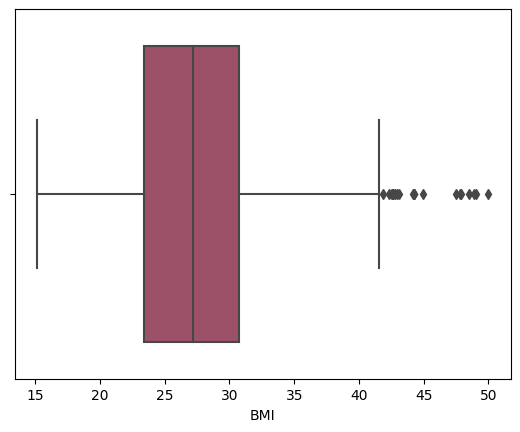

In [13]:
sns.boxplot(data=df, x='BMI')
plt.show()

## 

### Distribution of Age

In [14]:
data = df.copy()

In [15]:
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969
...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,23.458562
982,64,1,1,0,0,153,70,0,0,3,28000,29.903029
983,56,0,1,0,0,155,71,0,0,1,29000,29.552549
984,47,1,1,0,0,158,73,1,0,1,39000,29.242109


In [16]:
data['Age'].max()

66

In [17]:
data['age_category'] = pd.cut(data['Age'], bins=[17,30,50,66], labels = ['young','middle age','old'])
data

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,age_category
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,middle age
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,old
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,middle age
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,old
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,middle age
...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,23.458562,young
982,64,1,1,0,0,153,70,0,0,3,28000,29.903029,old
983,56,0,1,0,0,155,71,0,0,1,29000,29.552549,old
984,47,1,1,0,0,158,73,1,0,1,39000,29.242109,middle age


In [18]:
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969
...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,23.458562
982,64,1,1,0,0,153,70,0,0,3,28000,29.903029
983,56,0,1,0,0,155,71,0,0,1,29000,29.552549
984,47,1,1,0,0,158,73,1,0,1,39000,29.242109


In [19]:
colors = ['#3C4F76' , '#D1BEB0' , '#AB9F9D']
labels = data['age_category'].value_counts().index
values = data['age_category'].value_counts()

# create pie chart

pie_chart = go.Figure(go.Pie(labels = labels, values = values, ))
pie_chart.update_traces(hoverinfo = 'label+value' , textinfo = 'percent', textfont_size = 20, 
                        marker = dict(colors = colors, line = dict( color = '#000000', width=2)))

# Bar Chart

bar_chart = go.Figure(go.Bar(x = labels, y = values, marker_color = colors))

# create subplots

fig = sp.make_subplots( rows = 1, cols = 2, column_width = [0.5,0.5], specs = [[{'type' : 'bar'}, {'type' : 'pie'}]],
                      subplot_titles = ("Bar Chart", "Pie Chart"))

# Add charts to subplots

fig.add_trace(bar_chart.data[0], row=1, col=1)
fig.add_trace(pie_chart.data[0], row=1, col=2)

# Update layout
fig.update_layout(showlegend=False,title_text="Distribution of Age",
                xaxis=dict(title='Age-Groups',titlefont_size=16,tickfont_size=14,),
                yaxis=dict(title='Count',titlefont_size=16,tickfont_size=14,))

# Show subplots
fig.show(renderer='iframe_connected')




### Distribution of Height

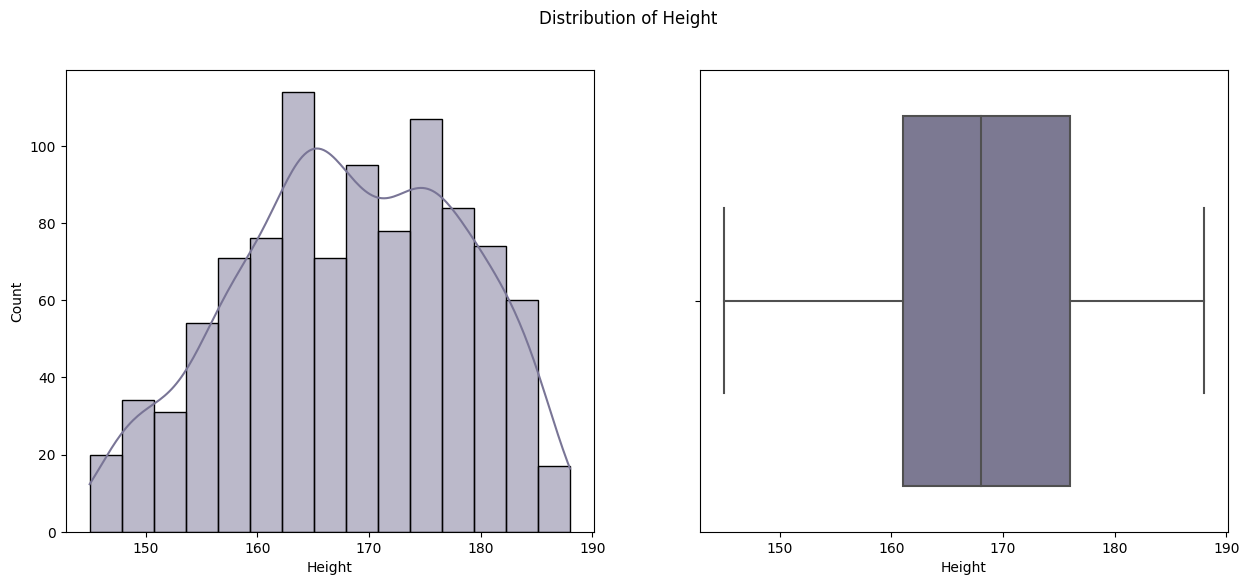

In [20]:

plt.figure(figsize = (15, 6))

# Histplot
plt.subplot(1,2,1)
sns.histplot(data = data , x = 'Height', kde = True, color = '#797596')
plt.xlabel('Height')
plt.ylabel('Count')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(data = data, x = 'Height', color = '#797596')
plt.xlabel('Height')

plt.suptitle('Distribution of Height')
plt.show()


### Distribution of Weight 

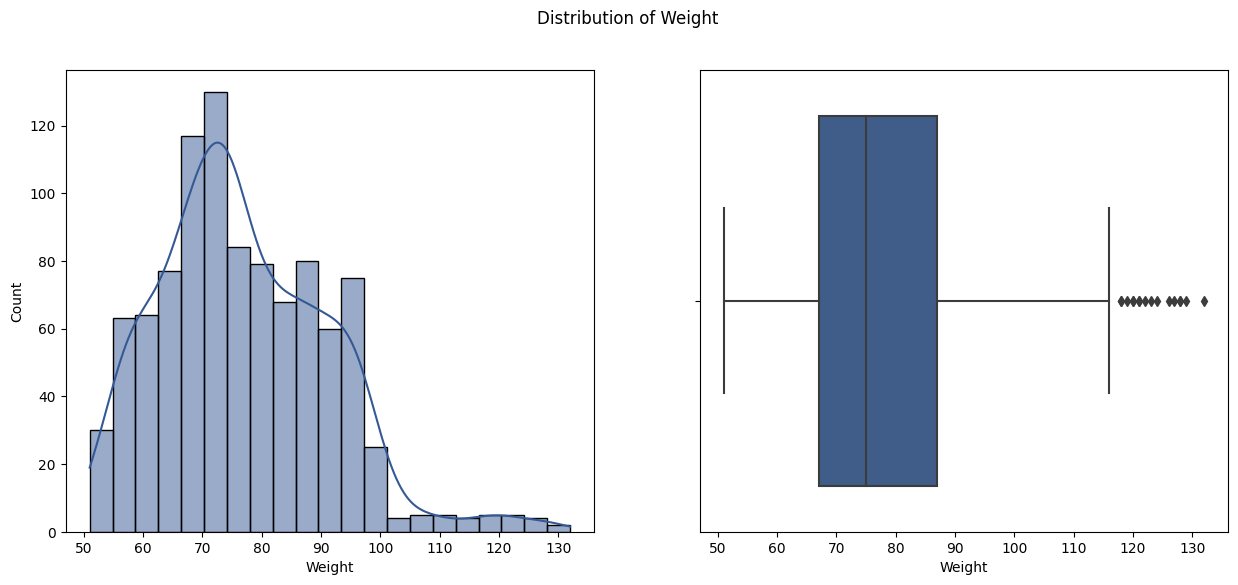

In [21]:
plt.figure(figsize = (15, 6))

# Histplot
plt.subplot(1,2,1)
sns.histplot(data = data , x = 'Weight', kde = True, color = '#345995')
plt.xlabel('Weight')
plt.ylabel('Count')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(data = data, x = 'Weight', color = '#345995')
plt.xlabel('Weight')

plt.suptitle('Distribution of Weight')
plt.show()


### Distribution of BMI

In [22]:
data['BMI']

0      23.725286
1      22.530864
2      23.634033
3      27.770313
4      31.934969
         ...    
981    23.458562
982    29.903029
983    29.552549
984    29.242109
985    30.043262
Name: BMI, Length: 986, dtype: float64

In [23]:
data['BMI_category'] = pd.cut(data['BMI'],bins = [0,18.5,24.9,29.9, float('inf')], labels = ['Underweight','Normal', 'Overweight', 'Obese'])
data['BMI_category']

0          Normal
1          Normal
2          Normal
3      Overweight
4           Obese
          ...    
981        Normal
982         Obese
983    Overweight
984    Overweight
985         Obese
Name: BMI_category, Length: 986, dtype: category
Categories (4, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obese']

In [24]:
# colors = ['#f6f5f5', '#fe346e', '#512b58', '#2c003e','#636efa']
#colors  = ['#E0B1CB','#BE95C4','#9F86C0','#5E548E','#231942']
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
labels = data['BMI_category'].value_counts().index
values = data['BMI_category'].value_counts()

# create pie chart

pie_chart = go.Figure(go.Pie(labels = labels, values = values,pull = [0.05,0.05,0.03,0.03] ))
pie_chart.update_traces(hoverinfo = 'label+value' , textinfo = 'percent', textfont_size = 20, 
                        marker = dict(colors = [colors[0], colors[1],colors[2],colors[3]], line = dict( color = '#000000', width=2)))

# Bar Chart

bar_chart = go.Figure(go.Bar(x = labels, y = values, marker_color = [colors[0], colors[1],colors[2],colors[3]]))

# create subplots

fig = sp.make_subplots( rows = 1, cols = 2, column_width = [0.5,0.5], specs = [[{'type' : 'bar'}, {'type' : 'pie'}]],
                      subplot_titles = ("Bar Chart", "Pie Chart"))

# Add charts to subplots

fig.add_trace(bar_chart.data[0], row=1, col=1)
fig.add_trace(pie_chart.data[0], row=1, col=2)

# Update layout
fig.update_layout(showlegend=False,title_text="Distribution of BMI",
                xaxis=dict(title='BMI-Groups',titlefont_size=16,tickfont_size=14,),
                yaxis=dict(title='Count',titlefont_size=16,tickfont_size=14,))

# Show subplots
fig.show(renderer='iframe_connected')


### Distribution of 'BloodPressureProblems'

In [25]:
data['BloodPressureProblems'].value_counts()

BloodPressureProblems
0    524
1    462
Name: count, dtype: int64

In [26]:
colors = ['#D0CDD7' , '#ACB0BD']
labels = ['No','Yes']
values = data['BloodPressureProblems'].value_counts()

# create pie chart

pie_chart = go.Figure(go.Pie(labels = labels, values = values, ))
pie_chart.update_traces(hoverinfo = 'label+value' , textinfo = 'percent', textfont_size = 20, 
                        marker = dict(colors = colors, line = dict( color = '#000000', width=2)))

# Bar Chart

bar_chart = go.Figure(go.Bar(x = labels, y = values, marker_color = colors))

# create subplots

fig = sp.make_subplots( rows = 1, cols = 2, column_width = [0.5,0.5], specs = [[{'type' : 'bar'}, {'type' : 'pie'}]],
                      subplot_titles = ("Bar Chart", "Pie Chart"))

# Add charts to subplots

fig.add_trace(bar_chart.data[0], row=1, col=1)
fig.add_trace(pie_chart.data[0], row=1, col=2)

# Update layout
fig.update_layout(showlegend=False,title_text="Distribution of Blood Pressure Problems",
                xaxis=dict(title='Blood Pressure Problems',titlefont_size=16,tickfont_size=14,),
                yaxis=dict(title='Count',titlefont_size=16,tickfont_size=14,))

# Show subplots
fig.show(renderer='iframe_connected')


### Distribution of transplants

In [27]:
data['AnyTransplants'].value_counts()

AnyTransplants
0    931
1     55
Name: count, dtype: int64

In [28]:
colors = ['#D3C0CD' , '#B19994']
labels = ['No','Yes']
values = data['AnyTransplants'].value_counts()

# create pie chart

pie_chart = go.Figure(go.Pie(labels = labels, values = values, ))
pie_chart.update_traces(hoverinfo = 'label+value' , textinfo = 'percent', textfont_size = 20, 
                        marker = dict(colors = colors, line = dict( color = '#000000', width=2)))

# Bar Chart

bar_chart = go.Figure(go.Bar(x = labels, y = values, marker_color = colors))

# create subplots

fig = sp.make_subplots( rows = 1, cols = 2, column_width = [0.5,0.5], specs = [[{'type' : 'bar'}, {'type' : 'pie'}]],
                      subplot_titles = ("Bar Chart", "Pie Chart"))

# Add charts to subplots

fig.add_trace(bar_chart.data[0], row=1, col=1)
fig.add_trace(pie_chart.data[0], row=1, col=2)

# Update layout
fig.update_layout(showlegend=False,title_text="Distribution of Transplants",
                xaxis=dict(title='No. of Transplants',titlefont_size=16,tickfont_size=14,),
                yaxis=dict(title='Count',titlefont_size=16,tickfont_size=14,))

# Show subplots
fig.show(renderer='iframe_connected')


### Distribution of Chronic Diseases

In [29]:
data

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,age_category,BMI_category
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,middle age,Normal
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,old,Normal
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,middle age,Normal
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,old,Overweight
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,middle age,Obese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,23.458562,young,Normal
982,64,1,1,0,0,153,70,0,0,3,28000,29.903029,old,Obese
983,56,0,1,0,0,155,71,0,0,1,29000,29.552549,old,Overweight
984,47,1,1,0,0,158,73,1,0,1,39000,29.242109,middle age,Overweight


In [30]:
data['AnyChronicDiseases'].value_counts()

AnyChronicDiseases
0    808
1    178
Name: count, dtype: int64

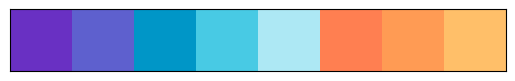

In [31]:
custom_palette(bo)

In [32]:
colors = [bo[3] , bo[7]]
labels = ['No','Yes']
values = data['AnyChronicDiseases'].value_counts()

# create pie chart

pie_chart = go.Figure(go.Pie(labels = labels, values = values, ))
pie_chart.update_traces(hoverinfo = 'label+value' , textinfo = 'percent', textfont_size = 20, 
                        marker = dict(colors = colors, line = dict( color = '#000000', width=2)))

# Bar Chart

bar_chart = go.Figure(go.Bar(x = labels, y = values, marker_color = colors))

# create subplots

fig = sp.make_subplots( rows = 1, cols = 2, column_width = [0.5,0.5], specs = [[{'type' : 'bar'}, {'type' : 'pie'}]],
                      subplot_titles = ("Bar Chart", "Pie Chart"))

# Add charts to subplots

fig.add_trace(bar_chart.data[0], row=1, col=1)
fig.add_trace(pie_chart.data[0], row=1, col=2)

# Update layout
fig.update_layout(showlegend=False,title_text="Distribution of Chronic Diseases",
                xaxis=dict(title='Chronic Diseases',titlefont_size=16,tickfont_size=14,),
                yaxis=dict(title='Count',titlefont_size=16,tickfont_size=14,))

# Show subplots
fig.show(renderer='iframe_connected')


### Distribution of Allergies

In [33]:
data['KnownAllergies'].value_counts()

KnownAllergies
0    774
1    212
Name: count, dtype: int64

In [34]:
# colors = ['#A167A5','#D3BCCC']
colors = ['#716969', '#BCABAE']
labels = ['No','Yes']
values = data['KnownAllergies'].value_counts()

# create pie chart

pie_chart = go.Figure(go.Pie(labels = labels, values = values, ))
pie_chart.update_traces(hoverinfo = 'label+value' , textinfo = 'percent', textfont_size = 20, 
                        marker = dict(colors = colors, line = dict( color = '#000000', width=2)))

# Bar Chart

bar_chart = go.Figure(go.Bar(x = labels, y = values, marker_color = colors))

# create subplots

fig = sp.make_subplots( rows = 1, cols = 2, column_width = [0.5,0.5], specs = [[{'type' : 'bar'}, {'type' : 'pie'}]],
                      subplot_titles = ("Bar Chart", "Pie Chart"))

# Add charts to subplots

fig.add_trace(bar_chart.data[0], row=1, col=1)
fig.add_trace(pie_chart.data[0], row=1, col=2)

# Update layout
fig.update_layout(showlegend=False,title_text="Distribution of Allergies",
                xaxis=dict(title='Allergies',titlefont_size=16,tickfont_size=14,),
                yaxis=dict(title='Count',titlefont_size=16,tickfont_size=14,))

# Show subplots
fig.show(renderer='iframe_connected')


### Distribution of Cancer History

In [35]:
data['HistoryOfCancerInFamily'].value_counts()

HistoryOfCancerInFamily
0    870
1    116
Name: count, dtype: int64

In [36]:
colors=['#485696','#F9C784']
# labels = data['HistoryOfCancerInFamily'].value_counts().index
labels = ['No', 'Yes']
values = data['HistoryOfCancerInFamily'].value_counts()

# create pie chart

pie_chart = go.Figure(go.Pie(labels = labels, values = values, ))
pie_chart.update_traces(hoverinfo = 'label+value' , textinfo = 'percent', textfont_size = 20, 
                        marker = dict(colors = colors, line = dict( color = '#000000', width=2)))

# Bar Chart

bar_chart = go.Figure(go.Bar(x = labels, y = values, marker_color = colors))

# create subplots

fig = sp.make_subplots( rows = 1, cols = 2, column_width = [0.5,0.5], specs = [[{'type' : 'bar'}, {'type' : 'pie'}]],
                      subplot_titles = ("Bar Chart", "Pie Chart"))

# Add charts to subplots

fig.add_trace(bar_chart.data[0], row=1, col=1)
fig.add_trace(pie_chart.data[0], row=1, col=2)

# Update layout
fig.update_layout(showlegend=False,title_text="Distribution of Cancer History",
                xaxis=dict(title='Cancer History',titlefont_size=16,tickfont_size=14,),
                yaxis=dict(title='Count',titlefont_size=16,tickfont_size=14,))

# Show subplots
fig.show(renderer = 'iframe_connected')


### Distribution of No. Of Surgeries

In [37]:
data['NumberOfMajorSurgeries'].value_counts()

NumberOfMajorSurgeries
0    479
1    372
2    119
3     16
Name: count, dtype: int64

In [38]:
colors = ['#006BA6','#C1B372','#FFBC42','#D81159']
labels = data['NumberOfMajorSurgeries'].value_counts().index

values = data['NumberOfMajorSurgeries'].value_counts()

# create pie chart

pie_chart = go.Figure(go.Pie(labels = labels, values = values, ))
pie_chart.update_traces(hoverinfo = 'label+value' , textinfo = 'percent', textfont_size = 20, 
                        marker = dict(colors = colors, line = dict( color = '#000000', width=2)))

# Bar Chart

bar_chart = go.Figure(go.Bar(x = labels, y = values, marker_color = colors))

# create subplots

fig = sp.make_subplots( rows = 1, cols = 2, column_width = [0.5,0.5], specs = [[{'type' : 'bar'}, {'type' : 'pie'}]],
                      subplot_titles = ("Bar Chart", "Pie Chart"))

# Add charts to subplots

fig.add_trace(bar_chart.data[0], row=1, col=1)
fig.add_trace(pie_chart.data[0], row=1, col=2)

# Update layout
fig.update_layout(showlegend=False,title_text="Distribution of Major Surgeries",
                xaxis=dict(title='Number of major surgeries',titlefont_size=16,tickfont_size=14,),
                yaxis=dict(title='Count',titlefont_size=16,tickfont_size=14,))

# Show subplots
fig.show(renderer='iframe_connected')



### Distribution of Target Variable

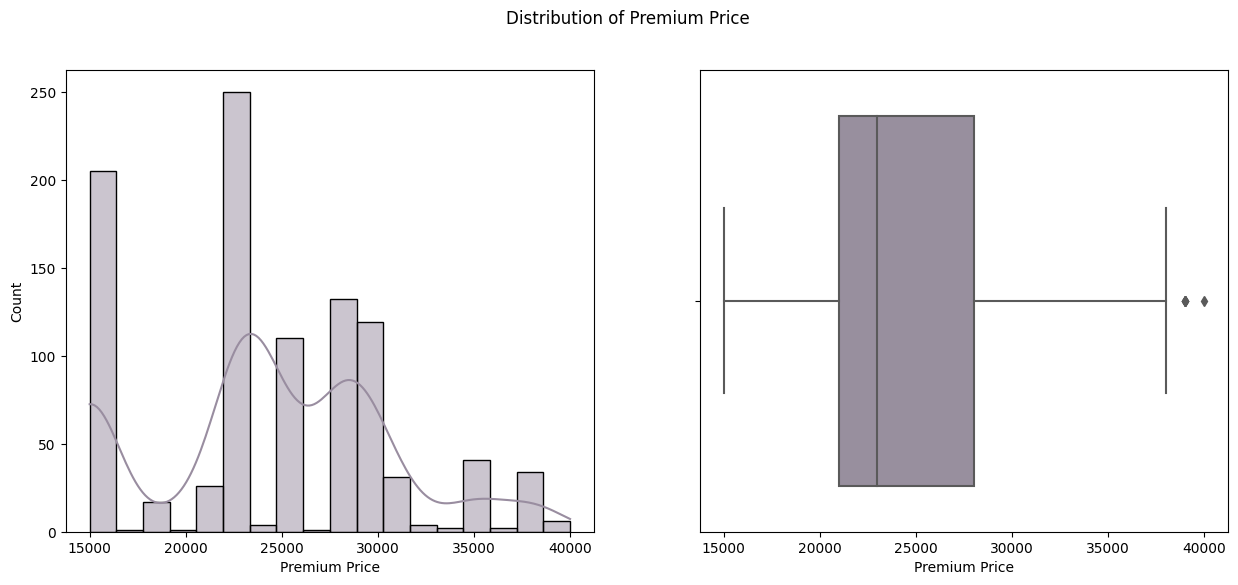

In [39]:
plt.figure(figsize = (15, 6))

# Histplot
plt.subplot(1,2,1)
sns.histplot(data = data , x = 'PremiumPrice', kde = True, color = '#998DA0')
plt.xlabel('Premium Price')
plt.ylabel('Count')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(data = data, x = 'PremiumPrice', color = '#998DA0')
plt.xlabel('Premium Price')

plt.suptitle('Distribution of Premium Price')
plt.show()


In [40]:
#BCA0BC

## 📉 Bivariate Analysis

### Distribution of premium price in age-category

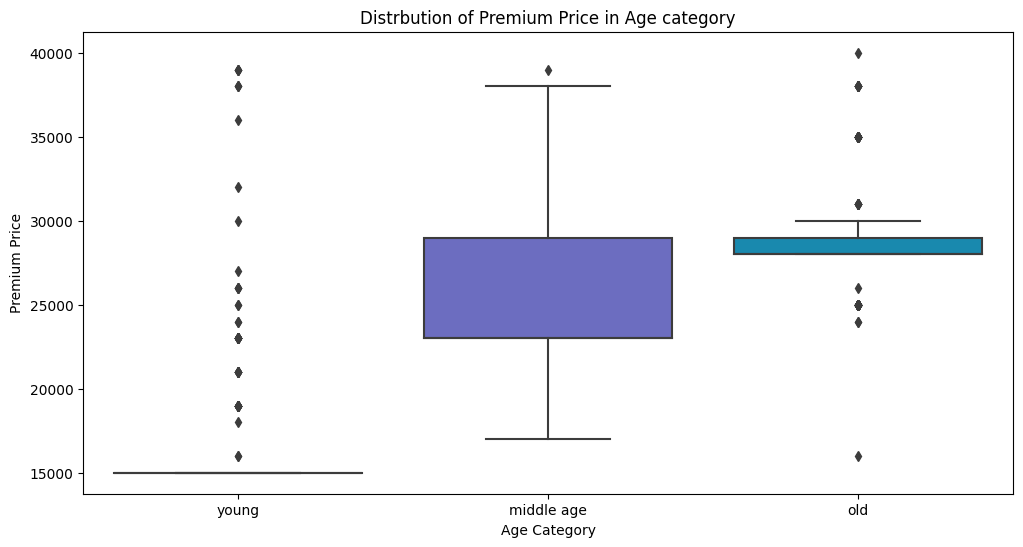

In [41]:
plt.figure(figsize = (12,6))
sns.boxplot(data = data , y = 'PremiumPrice', x = 'age_category')
plt.xlabel('Age Category')
plt.ylabel('Premium Price')
plt.title('Distrbution of Premium Price in Age category')
plt.show()

### Distribtion of Premium Price in BMI Categroy

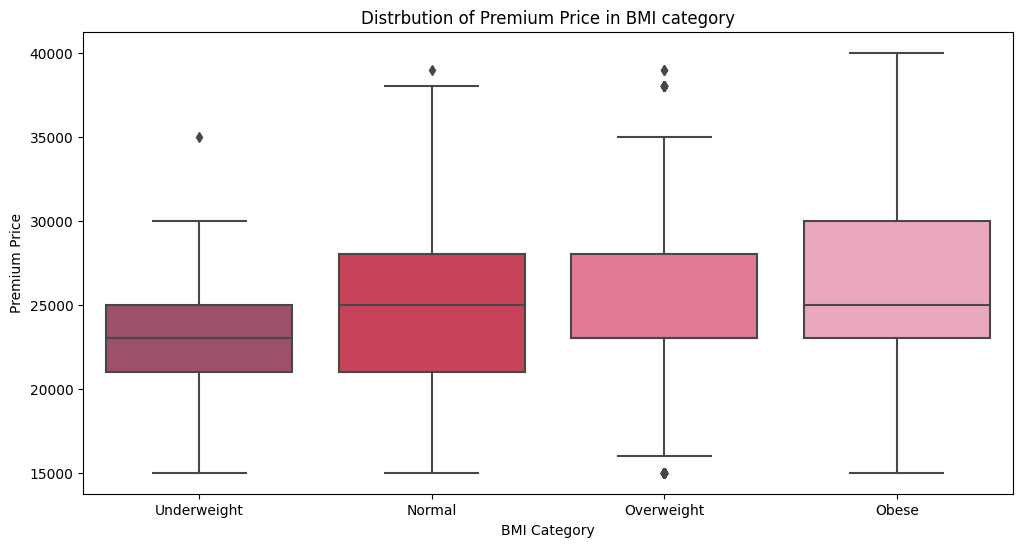

In [42]:
plt.figure(figsize = (12,6))
sns.boxplot(data = data , y = 'PremiumPrice', x = 'BMI_category', palette = pink)
plt.xlabel('BMI Category')
plt.ylabel('Premium Price')
plt.title('Distrbution of Premium Price in BMI category')
plt.show()

### Distribution of Premium Price in 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies',	'HistoryOfCancerInFamily' and	'NumberOfMajorSurgeries'

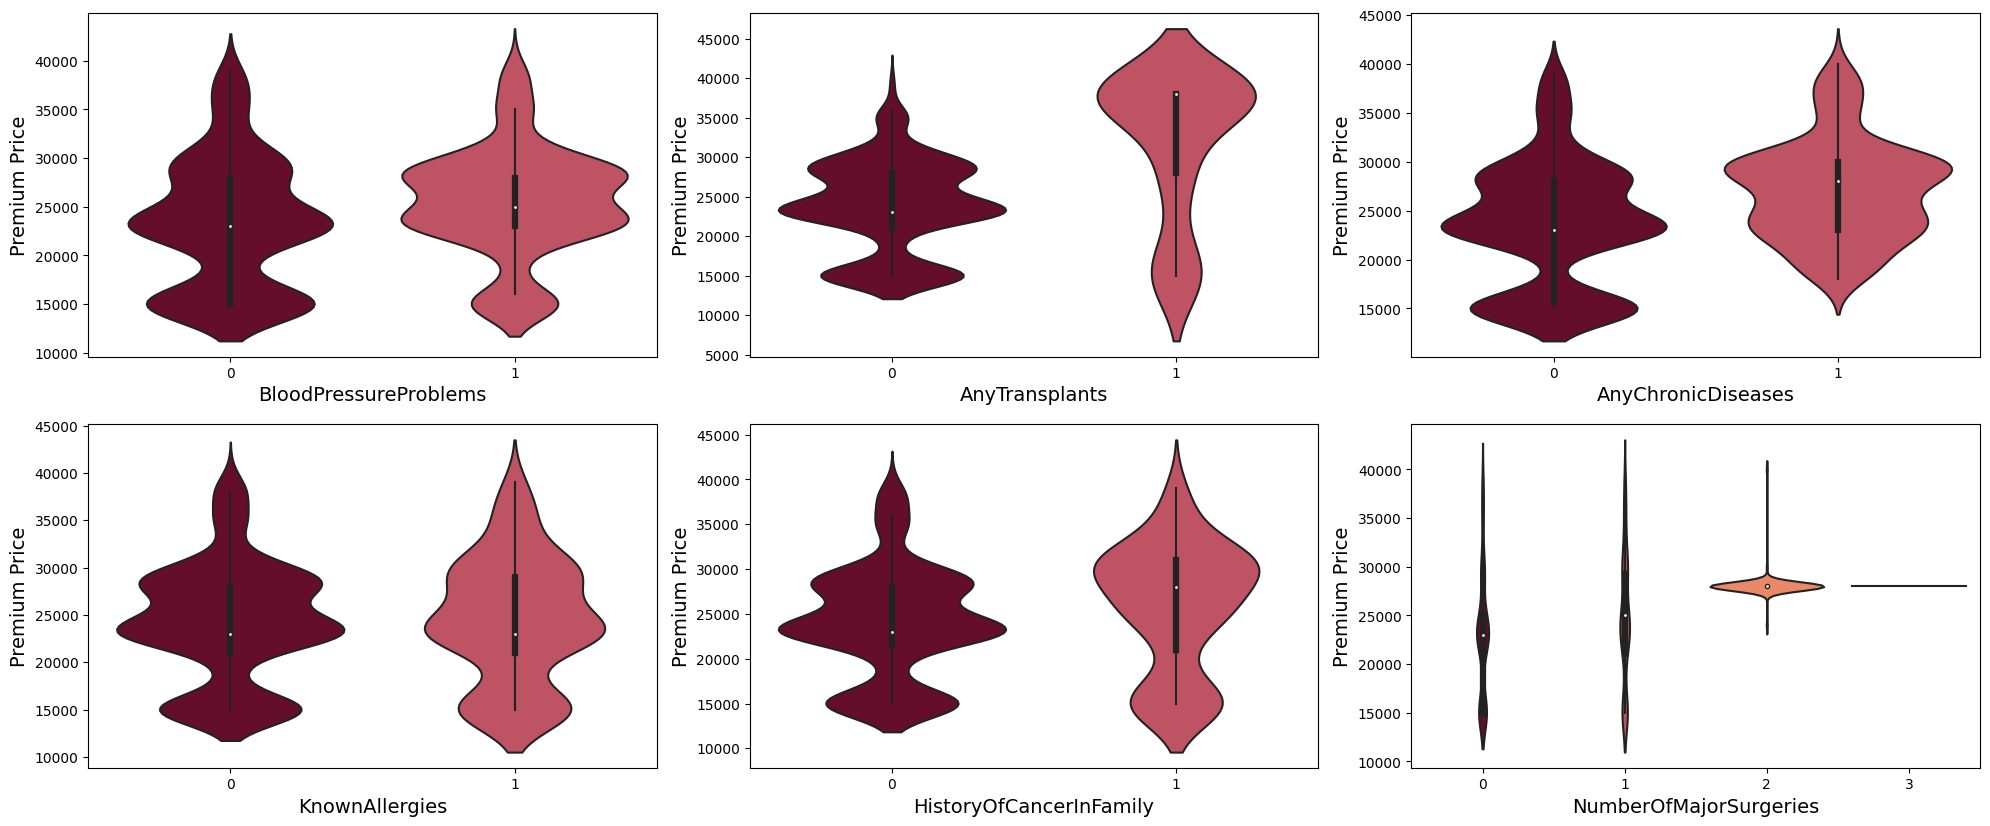

In [43]:
cols = ['BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily','NumberOfMajorSurgeries']
plt.figure(figsize =(20,12))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    sns.violinplot(data = data , x = cols[i], y = 'PremiumPrice', palette =  red[1:])
    plt.xlabel(cols[i], fontsize =14)
    plt.ylabel('Premium Price', fontsize = 14)
plt.tight_layout()
plt.show()
    

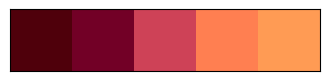

In [44]:
custom_palette(red)

### Heatmap and Correlation

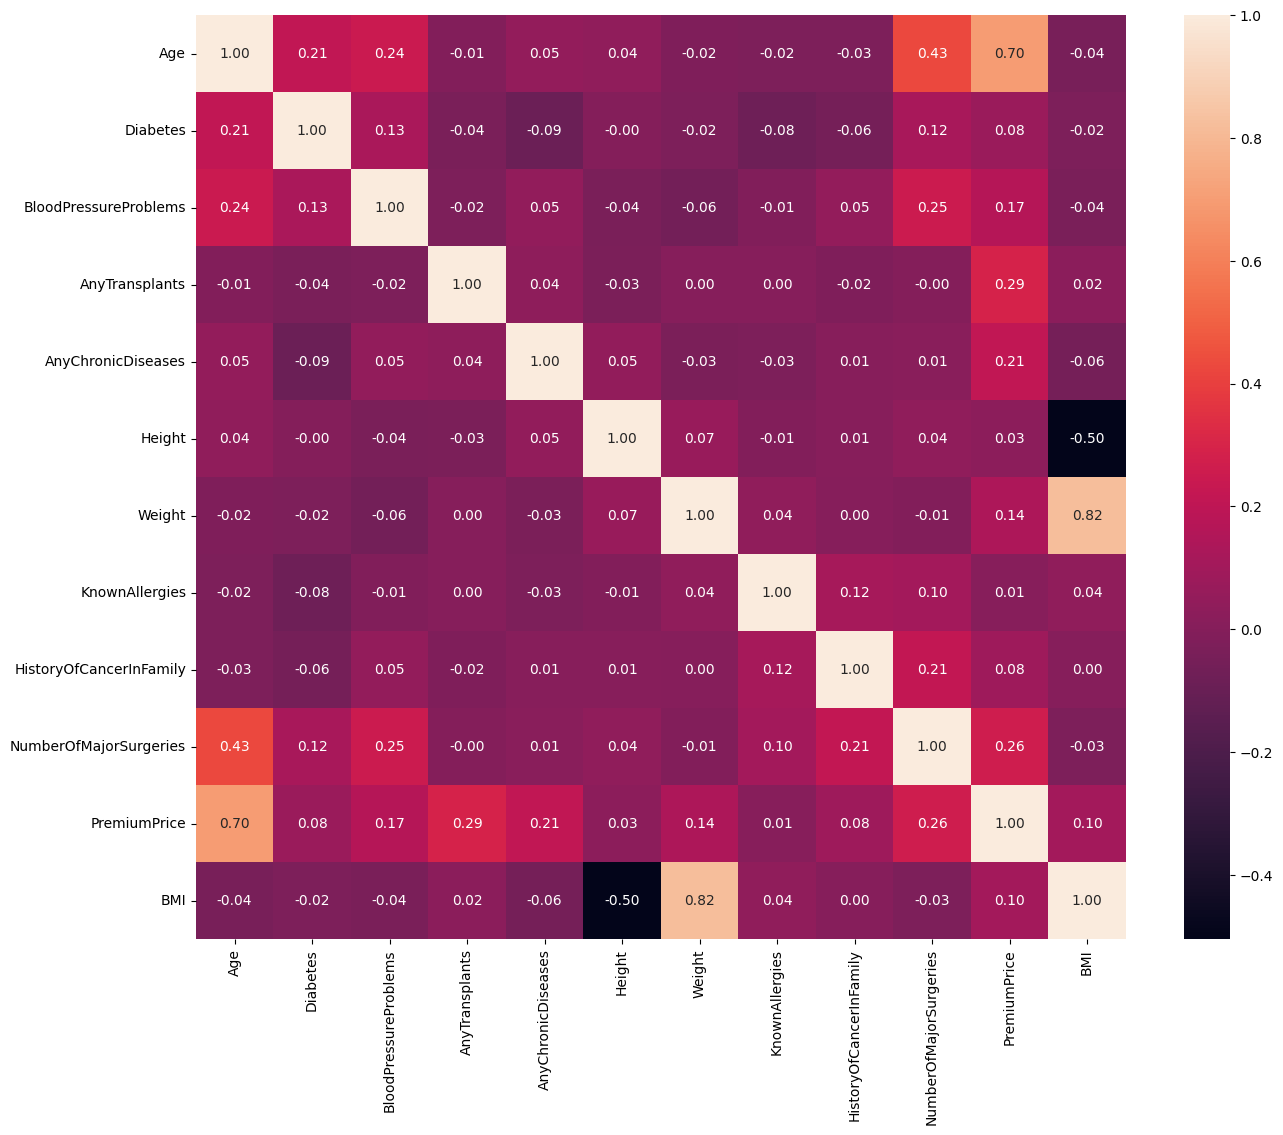

In [45]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap='rocket',fmt='.2f')
plt.show()

# ⚒ Data Preprocessing

## 👯 Checking Duplicates

In [46]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [Age, Diabetes, BloodPressureProblems, AnyTransplants, AnyChronicDiseases, Height, Weight, KnownAllergies, HistoryOfCancerInFamily, NumberOfMajorSurgeries, PremiumPrice, BMI]
Index: []


## 👾 Checking Outliers

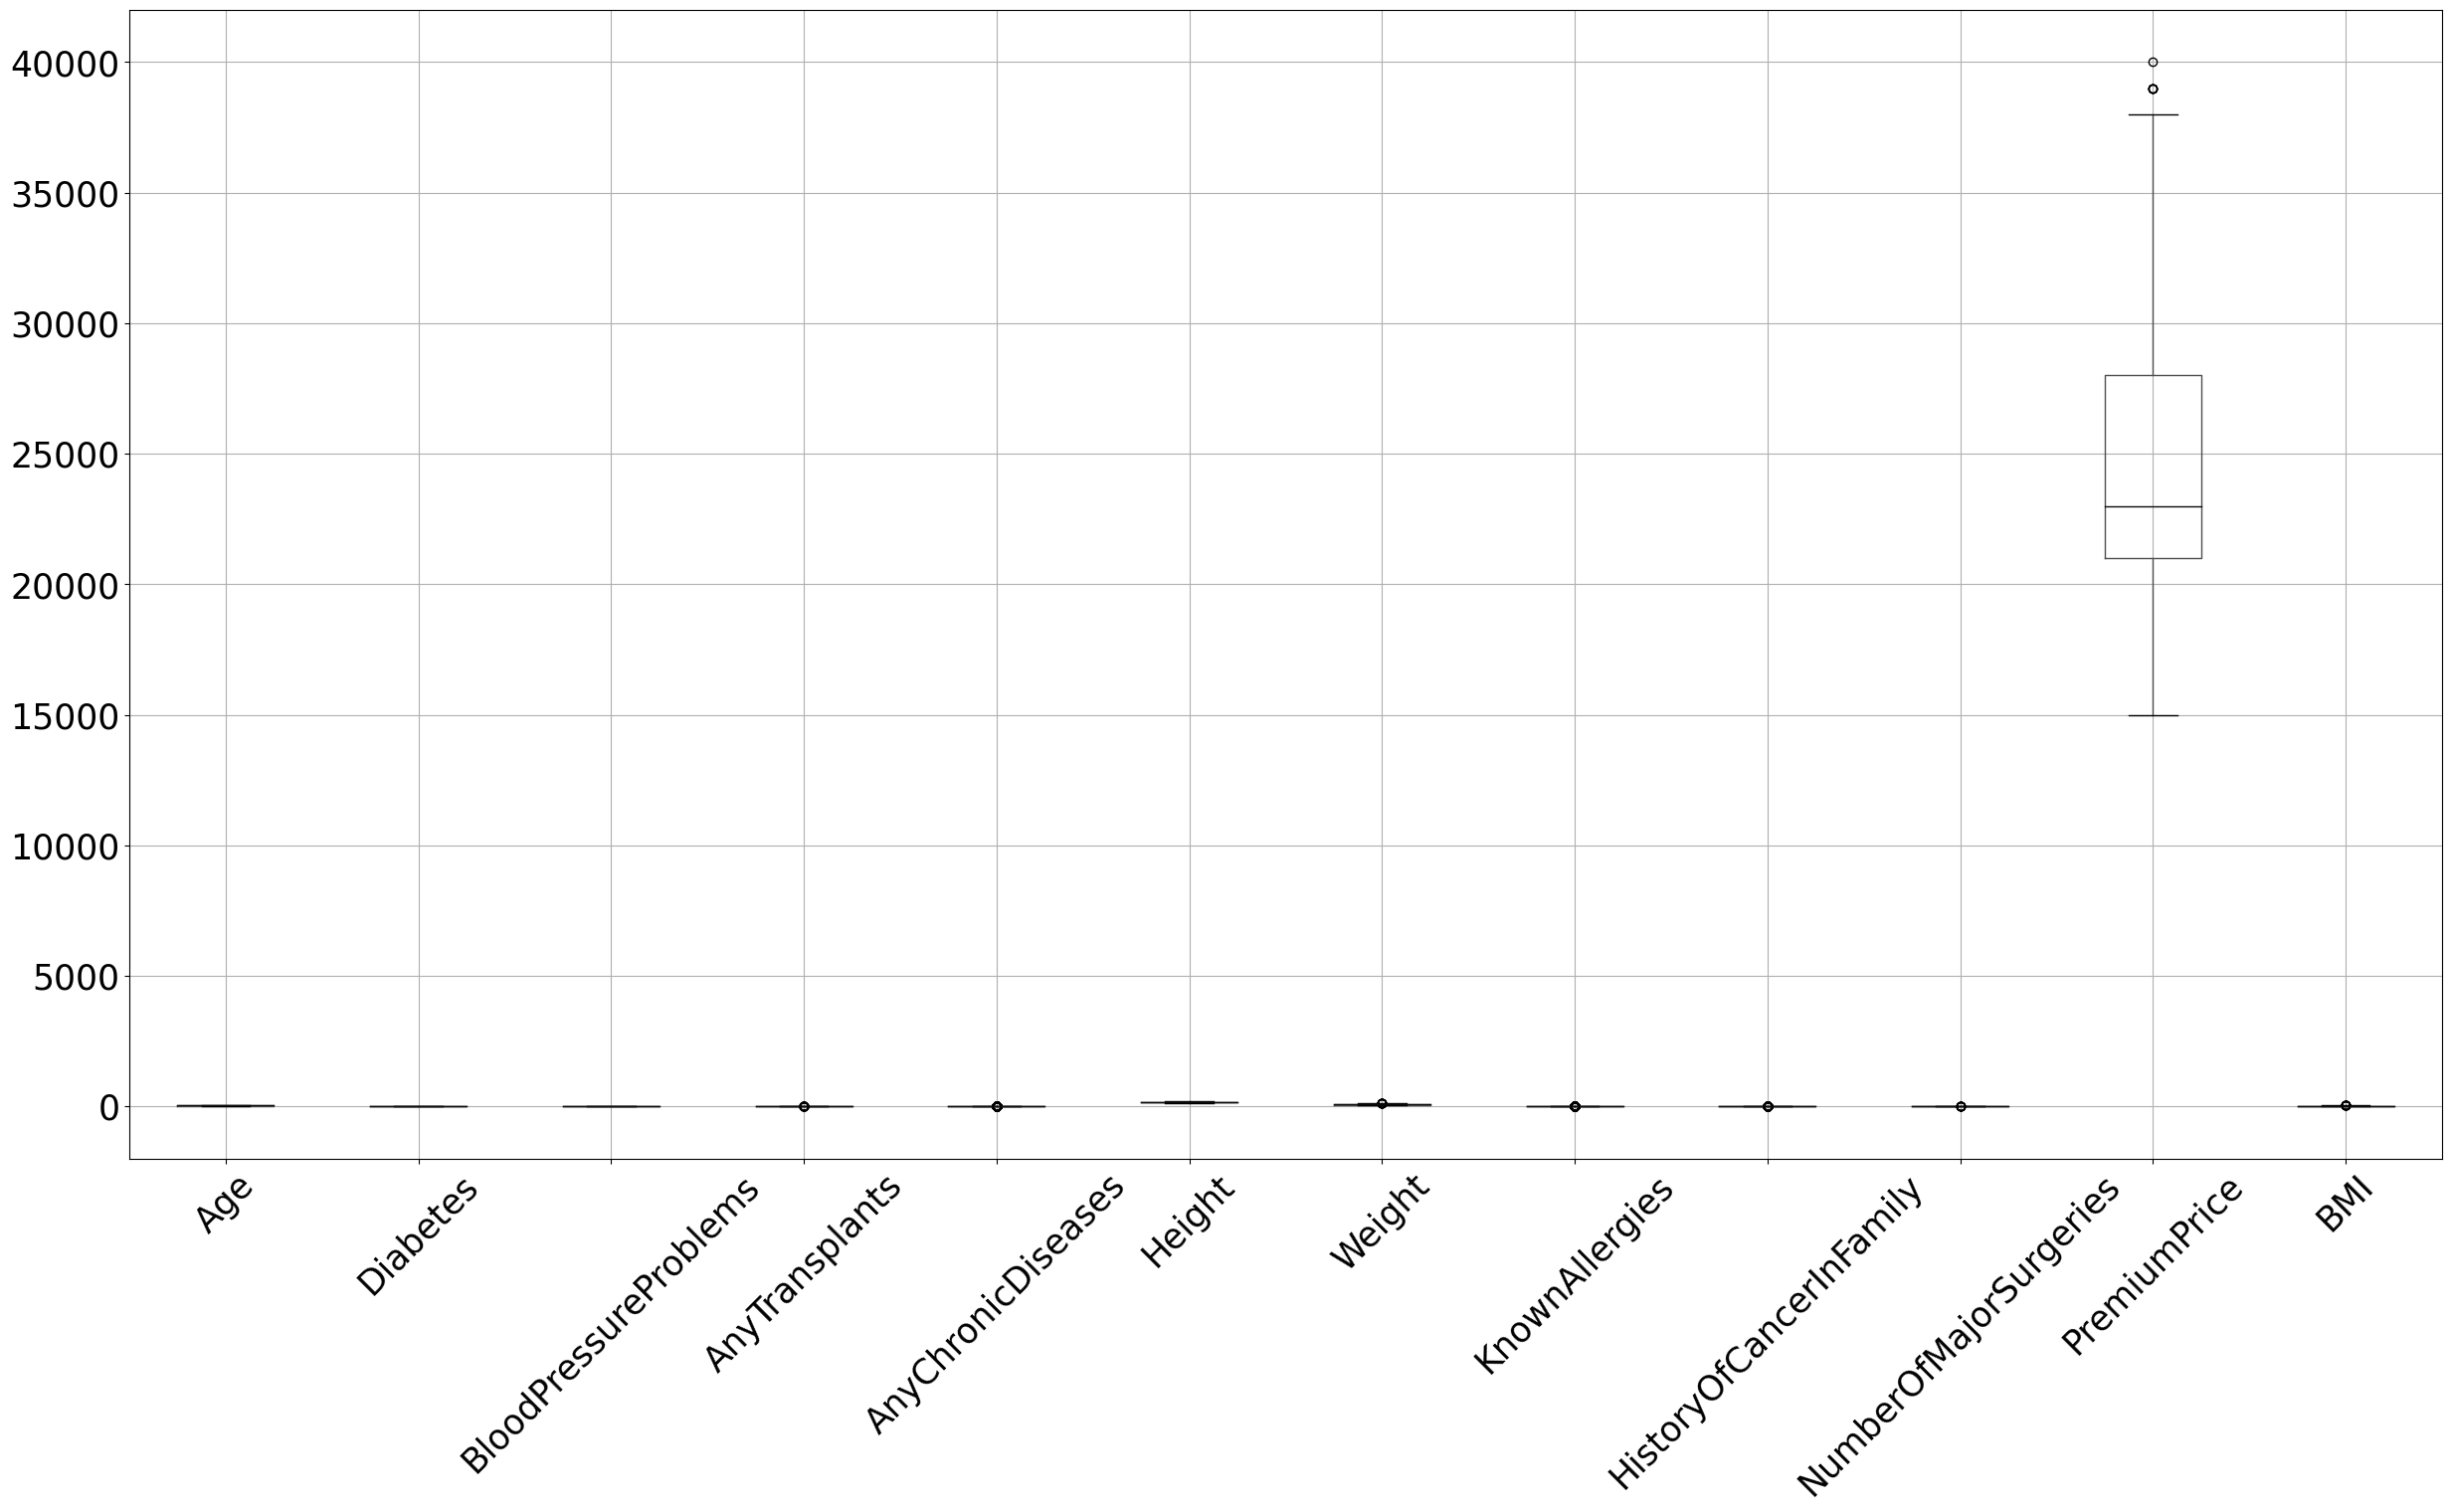

In [47]:
df.boxplot(rot=45, figsize=(30,15), fontsize = 25)
plt.show()

**Inference**

The dataset contains very few outliers, and given its relatively small size, we have chosen not to remove any outliers to preserve the integrity of the data.

# 🛠️ Data Preparation

## ✂️ Splitting data into train and test data

In [48]:
X = df.drop(columns=['PremiumPrice'])
y = df['PremiumPrice']

In [49]:
X

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI
0,45,0,0,0,0,155,57,0,0,0,23.725286
1,60,1,0,0,0,180,73,0,0,0,22.530864
2,36,1,1,0,0,158,59,0,0,1,23.634033
3,52,1,1,0,1,183,93,0,0,2,27.770313
4,38,0,0,0,1,166,88,0,0,1,31.934969
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,23.458562
982,64,1,1,0,0,153,70,0,0,3,29.903029
983,56,0,1,0,0,155,71,0,0,1,29.552549
984,47,1,1,0,0,158,73,1,0,1,29.242109


In [50]:
y

0      25000
1      29000
2      23000
3      28000
4      23000
       ...  
981    15000
982    28000
983    29000
984    39000
985    15000
Name: PremiumPrice, Length: 986, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state = 42, test_size = 0.25)

In [52]:
X_train.shape

(739, 11)

In [53]:
X_test.shape

(247, 11)

## 📏 Feature Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

In [55]:
X_train_scaled

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI
0,0.026630,-0.854798,-0.915592,-0.236039,-0.470625,1.677017,0.492592,-0.536150,-0.350857,0.447422,-0.486226
1,-0.545865,1.169867,-0.915592,-0.236039,-0.470625,0.974059,-0.688857,-0.536150,-0.350857,-0.880469,-1.063956
2,-0.903675,1.169867,-0.915592,-0.236039,-0.470625,-1.235239,-0.202378,-0.536150,-0.350857,-0.880469,0.511056
3,-0.760551,-0.854798,-0.915592,-0.236039,-0.470625,0.371523,-1.383828,-0.536150,-0.350857,-0.880469,-1.383531
4,0.312878,1.169867,-0.915592,-0.236039,-0.470625,-1.636929,-1.453325,-0.536150,-0.350857,-0.880469,-0.538135
...,...,...,...,...,...,...,...,...,...,...,...
734,1.314745,-0.854798,-0.915592,-0.236039,-0.470625,-1.335662,-1.314331,-0.536150,-0.350857,-0.880469,-0.554582
735,0.312878,-0.854798,1.092190,-0.236039,2.124835,-0.231013,-1.314331,-0.536150,-0.350857,0.447422,-1.080669
736,1.386307,1.169867,-0.915592,-0.236039,-0.470625,-0.733126,-0.758354,-0.536150,-0.350857,3.103205,-0.330019
737,-0.331180,1.169867,-0.915592,-0.236039,-0.470625,0.572368,-0.966846,1.865151,2.850168,0.447422,-1.121397


In [56]:
X_test_scaled

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI
0,0.568652,-0.838718,-1.012220,-0.263181,-0.465563,-0.270060,0.500480,2.062842,2.461126,0.434670,0.549467
1,-0.222858,-0.838718,-1.012220,-0.263181,2.147938,1.638521,-0.293335,2.062842,2.461126,0.434670,-1.076196
2,1.647983,1.192296,0.987927,-0.263181,-0.465563,-0.270060,0.716975,-0.484768,-0.406318,-0.924361,0.737546
3,-0.942412,-0.838718,-1.012220,-0.263181,-0.465563,1.065947,-0.509830,-0.484768,2.461126,0.434670,-0.987856
4,0.424741,1.192296,0.987927,-0.263181,-0.465563,0.302514,0.500480,2.062842,-0.406318,-0.924361,0.186393
...,...,...,...,...,...,...,...,...,...,...,...
242,0.928429,-0.838718,0.987927,-0.263181,-0.465563,0.397943,1.005635,2.062842,-0.406318,0.434670,0.533402
243,-1.086323,-0.838718,0.987927,-0.263181,-0.465563,-0.842635,3.098421,2.062842,2.461126,0.434670,3.384906
244,-0.222858,1.192296,0.987927,-0.263181,-0.465563,0.111656,0.067490,-0.484768,-0.406318,-0.924361,-0.055431
245,-1.302189,1.192296,-1.012220,-0.263181,-0.465563,0.207085,0.716975,-0.484768,-0.406318,0.434670,0.421424


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      986 non-null    int64  
 1   Diabetes                 986 non-null    int64  
 2   BloodPressureProblems    986 non-null    int64  
 3   AnyTransplants           986 non-null    int64  
 4   AnyChronicDiseases       986 non-null    int64  
 5   Height                   986 non-null    int64  
 6   Weight                   986 non-null    int64  
 7   KnownAllergies           986 non-null    int64  
 8   HistoryOfCancerInFamily  986 non-null    int64  
 9   NumberOfMajorSurgeries   986 non-null    int64  
 10  PremiumPrice             986 non-null    int64  
 11  BMI                      986 non-null    float64
dtypes: float64(1), int64(11)
memory usage: 92.6 KB


# 🪖 Model Training and Evaluation

## 💡 Training LightGBM model using optuna hyperparameter tuning and K-Fold cross validation

In [58]:
import optuna
import lightgbm as lgb
from lightgbm import early_stopping
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold

In [59]:
1e-1

0.1

In [60]:
def objective(trial):
    params = {
        'objective':'regression',
        'metric':'rmse',
        'n_estimators': trial.suggest_int('n_estimators',500,2000),
        'boosting_type': trial.suggest_categorical('boosting',['gbdt','dart']),
        'max_depth':trial.suggest_int('max_depth',3,10),
        'num_leaves': trial.suggest_int('num_leaves',4,128),
        'learning_rate':trial.suggest_loguniform('learning_rate',1e-4,1e-1),
        'feature_fraction':trial.suggest_uniform('feature_fraction',0.6,1.0),
        'bagging_fraction':trial.suggest_uniform('bagging_fraction',0.6,0.9),
        'bagging_freq':trial.suggest_int('bagging_freq',1,20),
        'min_data_in_leaf':trial.suggest_int('min_data_in_leaf', 5,30),
        'reg_alpha':trial.suggest_float('reg_alpha',1e-8,10.0,log = True),
        'reg_lambda':trial.suggest_float('reg_lambda',1e-8,10.0,log = True),
        'device_type':'gpu',
        'random_state':42,
        'verbose':-1
        }
    model = lgb.LGBMRegressor(**params)
    scores = []
    kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
    for train_idx,val_idx in kf.split(X_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        model.fit(X_tr,y_tr, eval_set = [(X_val, y_val)], callbacks=[early_stopping(stopping_rounds=100, verbose=False)])
        y_pred = model.predict(X_val)
        rmse = mean_squared_error(y_val,y_pred,squared = False)
        scores.append(rmse)

    return float(np.mean(scores))

In [61]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials = 50, show_progress_bar = True)

[I 2026-01-04 19:37:14,124] A new study created in memory with name: no-name-49f068ea-6822-44ac-b6a8-81faac8b5931


  0%|          | 0/50 [00:00<?, ?it/s]

1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


[I 2026-01-04 19:37:29,037] Trial 0 finished with value: 3269.7568932215227 and parameters: {'n_estimators': 792, 'boosting': 'dart', 'max_depth': 10, 'num_leaves': 93, 'learning_rate': 0.047452638131404885, 'feature_fraction': 0.8601944848575802, 'bagging_fraction': 0.8071265436612276, 'bagging_freq': 12, 'min_data_in_leaf': 19, 'reg_alpha': 0.0002502319675656374, 'reg_lambda': 1.2584853584759948e-05}. Best is trial 0 with value: 3269.7568932215227.
[I 2026-01-04 19:37:31,287] Trial 1 finished with value: 3282.8554479617333 and parameters: {'n_estimators': 1566, 'boosting': 'gbdt', 'max_depth': 9, 'num_leaves': 57, 'learning_rate': 0.08291413441511004, 'feature_fraction': 0.942656727851373, 'bagging_fraction': 0.7037544274112403, 'bagging_freq': 6, 'min_data_in_leaf': 23, 'reg_alpha': 0.007078801939598147, 'reg_lambda': 0.42443065620569165}. Best is trial 0 with value: 3269.7568932215227.
[I 2026-01-04 19:37:34,533] Trial 2 finished with value: 3057.6699033570044 and parameters: {'n_e

In [62]:
params = study.best_params
params

{'n_estimators': 1711,
 'boosting': 'gbdt',
 'max_depth': 6,
 'num_leaves': 20,
 'learning_rate': 0.004888192913522852,
 'feature_fraction': 0.9565510432186478,
 'bagging_fraction': 0.7278851255671521,
 'bagging_freq': 8,
 'min_data_in_leaf': 7,
 'reg_alpha': 5.104331080740892e-05,
 'reg_lambda': 2.3483339105932915e-06}

In [63]:
model = lgb.LGBMRegressor(**params)
model.fit(X_train, y_train)
model.predict(X_test)

array([30612.7591004 , 28262.69661421, 28361.81899854, 15396.83241299,
       25306.30071201, 28319.54726605, 24300.44833341, 24105.39782724,
       27894.59703552, 28191.25056639, 21886.28915134, 27938.8658305 ,
       15396.05684064, 17528.00441391, 34302.78837719, 28087.04300852,
       27901.12337061, 29700.07032419, 28467.92491586, 24020.29426486,
       38216.75820122, 14951.68807149, 23015.3365338 , 33721.95434411,
       37201.81120157, 25308.27631282, 25001.74756916, 27998.9117089 ,
       14111.34690826, 27748.13294978, 26632.86894468, 25069.03916779,
       14494.40016696, 25125.3023944 , 17931.60336497, 33932.92067277,
       23531.34213139, 22713.73825219, 18311.5340558 , 28039.59007338,
       25667.10348465, 23326.44400834, 23223.56738212, 22994.79171928,
       20727.9416266 , 25170.74726985, 27290.63000703, 27292.10603774,
       16974.66585462, 25271.92790482, 23736.24508227, 21179.86194906,
       27068.44884074, 15002.32826437, 29023.61964936, 23367.9191941 ,
      

In [64]:
lgb_regressor = lgb.train(params, lgb.Dataset(X_train, label = y_train))
y_pred = lgb_regressor.predict(X_test)
y_pred


array([30612.7591004 , 28262.69661421, 28361.81899854, 15396.83241299,
       25306.30071201, 28319.54726605, 24300.44833341, 24105.39782724,
       27894.59703552, 28191.25056639, 21886.28915134, 27938.8658305 ,
       15396.05684064, 17528.00441391, 34302.78837719, 28087.04300852,
       27901.12337061, 29700.07032419, 28467.92491586, 24020.29426486,
       38216.75820122, 14951.68807149, 23015.3365338 , 33721.95434411,
       37201.81120157, 25308.27631282, 25001.74756916, 27998.9117089 ,
       14111.34690826, 27748.13294978, 26632.86894468, 25069.03916779,
       14494.40016696, 25125.3023944 , 17931.60336497, 33932.92067277,
       23531.34213139, 22713.73825219, 18311.5340558 , 28039.59007338,
       25667.10348465, 23326.44400834, 23223.56738212, 22994.79171928,
       20727.9416266 , 25170.74726985, 27290.63000703, 27292.10603774,
       16974.66585462, 25271.92790482, 23736.24508227, 21179.86194906,
       27068.44884074, 15002.32826437, 29023.61964936, 23367.9191941 ,
      

## 📉 Evaluating Model Performance

### Evaluation metrics for LightGBM Regressor : R2 Score, Adjusted R2, Root Mean Squared Error, Mean, Absolute Error

In [65]:
def adj_r2_score(r_squared,n,d):
    # n is no. of sample
    # d is no. of features
    # r_squared is standard R²
    adj_r2 = 1 - (((1-r_squared)*(n-1))/(n-d-1))
    return adj_r2

In [66]:

r2_score = r2_score(y_test,y_pred)
adjusted_r2 = adj_r2_score(r2_score,len(y_test), X_test.shape[1])
rmse = mean_squared_error(y_test,y_pred,squared=False)
mae = mean_absolute_error(y_test,y_pred)

In [67]:
metrics = pd.DataFrame({'metric':['R2 Score', 'Adjusted R2','Root Mean Squared Error', 'Mean Absoulte Error'], 
                        'values':[r2_score, adjusted_r2, rmse, mae]})
metrics

,metric,values
0,R2 Score,0.832306
1,Adjusted R2,0.824457
2,Root Mean Squared Error,2704.457989
3,Mean Absoulte Error,1501.225873
